In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
palette_hc = ['#ffffff', '#ddaa33', '#bb5566', '#004488', '#000000']

import matplotlib
matplotlib.rcParams['figure.facecolor'] = 'white'

import seaborn as sns

from tqdm.auto import tqdm

import time
import os
from collections import OrderedDict
import json
import pickle

import gc

import sys
sys.path.append("../")

from src.helpers import calculate_RMSE_balanced, calculate_RMSE, Timer, autoscaling, \
                        calculate_composite_RMSE_V_CaT, update_array_from_kwargs, get_value_by_key

from src.postprocessing import collect_results, create_C_S

idx = pd.IndexSlice

# From cluster

In [98]:
cluster_name = "pikunov.av@calc.cod.phystech.edu"
folder_name_src = "/home/common/pikunov.av/pypoptim/results/voigt"
folder_name_dst = "../results/koivumaki/voigt"

folder_name_dst = os.path.abspath(folder_name_dst)

case_list = "G1/C1/210122_051129", "G2/C2/210122_082053", "G3/C1/210121_212326", "G4/C8/210122_001806"
#case_list = "G1/C1/210122_221831", "G2/C2/210123_122249", "G3/C1/210122_142150", "G4/C8/210123_031303"

case_list = "G1/C3/210126_181937", "G2/C4/210127_032432", "G3/C2/210127_141706"

case_list = "G1/C2/210203_181931", "G2/C2/210204_030703", 
case_list = 'G3/C5/210204_094751',


item_list = ['dump_last.npy',
             #'dump.bin',
             'phenotype/*.csv',
             'config_backup.pickle']

text = ""

for case in case_list:
    
    folder_name = os.path.join(folder_name_dst, case)
    os.makedirs(folder_name, exist_ok=True)
    
    for item in item_list:
        src = os.path.join(folder_name_src, case, item)
        head, _ = os.path.split(item)
        if head:
            dst = os.path.join(folder_name_dst, case, head)
            os.makedirs(dst, exist_ok=True)
        else:
            dst = os.path.join(folder_name_dst, case)
        request = f"scp -r {cluster_name}:{src} {dst}\n"
        text += request
        
filename_script = "../misc/from_cluster.sh"
with open(filename_script, 'w') as f:
    f.write(text)

In [99]:
%%bash

bash ../misc/from_cluster.sh

# Data loading

In [452]:
case_list = 'G3/C1/201224_215531', 'G3/C1/201224_210103', 'G3/C1/201223_220723', 
#case_list = 'G4/C8/201223_232912',
#case_list = 'G2/C2/201224_125711',
#case_list = 'G1/C1/201225_092709',

case_list = 'G3/C1/201223_220723', 
case_list = 'G3/C1/210113_133246',
case_list = 'G3/C1/210114_012849',

case_list = 'G3/C1/210114_153411',
#case_list = 'G3/C1/210114_154059',
#case_list = 'G3/C1/210114_154032',

#case_list = 'G3/C1/210114_153411', 'G3/C1/210114_154059', 'G3/C1/210114_154032'

# ical_ghk
# case_list = "G1/C1/210115_115857", # 3D ok
# case_list = "G2/C2/210115_183711", # 3D ok
case_list = 'G3/C1/210114_153411', 'G3/C1/210115_113955',
case_list = "G4/C8/210116_070854",

# case_list = "G1/C1/210115_115857", "G2/C2/210115_183711", 'G3/C1/210114_153411', "G4/C8/210116_070854"

# ical_ghk_tor
# case_list = "G1/C1/210118_200016",
# case_list = "G2/C2/210119_054105",
# case_list = "G3/C1/210118_195415",
# case_list = "G4/C8/210120_003000",

# case_list = "G1/C1/210118_200016", "G2/C2/210119_054105", "G3/C1/210118_195415", "G4/C8/210120_003000"

#ical_ghk + ical_gh_tor
case_list = ["G1/C1/210118_200016", "G2/C2/210119_054105", "G3/C1/210118_195415", "G4/C8/210120_003000",
             "G1/C1/210115_115857", "G2/C2/210115_183711", 'G3/C1/210114_153411', 'G3/C1/210115_113955', "G4/C8/210116_070854",
             ]

case_list = "G3/C1/210121_202018", "G3/C1/210121_202452"

In [2]:
# rel
case_list = "G1/C1/210122_051129", "G2/C2/210122_082053", "G3/C1/210121_212326", "G4/C8/210122_001806"
case_list += "G1/C1/210122_221831", "G2/C2/210123_122249", "G3/C1/210122_142150", "G4/C8/210123_031303"
case_list += "G1/C3/210126_181937", "G2/C4/210127_032432", "G3/C2/210127_141706"

In [56]:
case_list = 'G3/C1/210121_212326',

In [79]:
case_list = 'G3/C1/210204_143557',

In [101]:
output_list = []

dirname_results = "../results/maleckar/voigt"
dirname_results = "../results/koivumaki/voigt"
#dirname_results = "../results/voigt"


for case in tqdm(case_list):
    
    output_dict = collect_results(case, dirname_results, load_dump=False)
    #del output_dict['dump']
    gc.collect()
    output_list.append(output_dict)
    
#     dirname_report = os.path.join("../images/maleckar/reports/", case)
#     os.makedirs(dirname_report, exist_ok=True)

  0%|          | 0/1 [00:00<?, ?it/s]

phenotype:   0%|          | 0/6 [00:00<?, ?it/s]

In [102]:
output_dict['dump_last']

common                                                              \
       fitness       PNa      gCaL        gt      gKur       gK1       gKr   
0    -0.168349  0.512463  0.417628  0.488860  0.178161  0.128063  0.964488   
1    -0.168363  0.511373  0.460169  0.396513  0.256209  0.147333  1.041656   
2    -0.168571  0.699999  0.454387  0.562539  0.167022  0.126772  0.928050   
3    -0.168582  0.698852  0.450778  0.559593  0.169317  0.124986  0.935320   
4    -0.168889  0.550799  0.485599  0.485976  0.216392  0.137457  1.025926   
...        ...       ...       ...       ...       ...       ...       ...   
8187      -inf  3.318025  0.429827  0.318275  0.120861  0.224555  0.286580   
8188      -inf  0.675977  0.479364  0.378838  0.216677  0.105468  1.430124   
8189      -inf  0.648903  0.313795  0.481801  0.204458  0.130623  0.511822   
8190      -inf  0.657633  0.489880  0.429080  0.217039  0.150693  0.902388   
8191      -inf  0.523566  0.407388  0.513447  0.210482  0.131758  1.092789   

                                    ...      2064                   1032  \
           gKs      gNab      gCab  ...       Nai          Ki        Nai   
0     3.711586  0.145069  0.219467  ...  9.373596  159.281095  10.373740   
1     3.192951  0.157094  0.229881  ...  9.462022  158.310357  10.668376   
2     3.976429  0.105561  0.228022  ...  9.093205  159.118491  10.269687   
3     3.973893  0.100652  0.228986  ...  9.097670  159.174020  10.284616   
4     3.819690  0.110530  0.205464  ...  8.913239  159.954092   9.964610   
...        ...       ...       ...  ...       ...         ...        ...   
8187  1.957289  0.895547  0.165376  ...  8.614218  159.381286   9.769373   
8188  3.332992  0.105861  0.170472  ...  8.985831  160.015741   9.440365   
8189  3.387195  0.130457  0.204083  ...  8.708711  160.060910   9.607069   
8190  3.711142  0.161230  0.239604  ...  9.195702  160.016779  10.159247   
8191  4.357936  0.112290  0.212515  ...  8.681189  159.149730  10.061079   

                        516                    344                    258  \
              Ki        Nai          Ki        Nai          Ki        Nai   
0     155.874397  11.347909  100.853130  10.596736  100.027447  10.399693   
1     150.944403  11.800395  100.647063  10.573070  100.509839  10.452225   
2     150.923364  11.152360  101.863171  10.266173  100.242857  10.192570   
3     150.915991  11.156990  101.868646  10.323569  100.233390  10.211694   
4     152.526804  11.423238  100.982320  10.342476  100.810137  10.348852   
...          ...        ...         ...        ...         ...        ...   
8187  150.109232  10.944302  100.418132   9.976652   99.990888  10.125260   
8188  148.902662  11.441647  100.625873  10.573188  100.045681   9.822698   
8189  151.694506  11.134701  101.363274   9.954630  101.108440   9.741344   
8190  151.043773  11.817985  100.565502  10.464664  101.029105   9.540399   
8191  155.344134  11.648329  101.469056  10.495112   99.993453  10.237850   

                  
              Ki  
0     139.670137  
1     135.151452  
2     127.813744  
3     127.796056  
4     117.721153  
...          ...  
8187  136.658717  
8188  132.942740  
8189  133.675827  
8190  135.135874  
8191  137.736949  

[8192 rows x 28 columns]

In [103]:
columns_tuples = []

for output in output_list:
    tag, genes = output['trio'], output['genes']
    for exp_cond in genes:
        for gene in genes[exp_cond]:
            t = (exp_cond, gene)
            if t not in columns_tuples:
                columns_tuples.append(t)
                
columns_tuples = [('common', 'fitness')] + columns_tuples
                
m_index = pd.MultiIndex.from_tuples(columns_tuples)

index_tuples = [x['trio'] for x in output_list]
m_index_index = pd.MultiIndex.from_tuples(index_tuples)

df_sol = pd.DataFrame([[None for item in columns_tuples]] * len(output_list),
                      columns=m_index, index=m_index_index)

for i, output in enumerate(output_list):
    trio, genes, values = output['trio'], output['genes'], output['dump_last'].iloc[0]
    columns_i = [(item[0], key) for item in genes.items() for key in item[1]]
    columns_i = [('common', 'fitness')] + columns_i
    for j, c in enumerate(columns_i):
        df_sol.loc[trio, c] = values[j]
        
df_sol.index.names = ['Group', 'Cell', 'Case']
df_sol = df_sol.T.sort_index(axis='columns')

In [104]:
0.051738 * 5e-5 * 50

0.000129345

In [107]:
df_sol

Group                                     3
Cell                                      5
Case                          210204_094751
common fitness                    -0.168349
       PNa                         0.512463
       gCaL                        0.417628
       gt                          0.488860
       gKur                        0.178161
       gK1                         0.128063
       gKr                         0.964488
       gKs                         3.711586
       gNab                        0.145069
       gCab                        0.219467
       INaKmax                     0.294040
       ICaPmax                     5.566900
       gIf                         1.827078
       kNaCa                       1.240246
       Jrel_multiplier             2.358664
       J_SERCASR_multiplier        4.987879
       J_bulkSERCA_multiplier      0.310372
       kSRleak                     8.719906
2064   Nai                         9.373596
       Ki                        159.281095
1032   Nai                        10.373740
       Ki                        155.874397
516    Nai                        11.347909
       Ki                        100.853130
344    Nai                        10.596736
       Ki                        100.027447
258    Nai                        10.399693
       Ki                        139.670137

In [108]:
#df_sol.to_csv("../misc/coeffs_G3_C1_210121_212326.csv")

KeyError: 'tau_tr'

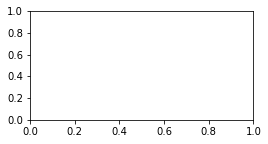

In [314]:
fig, ax = plt.subplots(figsize=(4, 2))

sns.swarmplot(x=np.log10(df_sol.loc[('common', 'tau_tr')].values.astype(float)), ax=ax)

plt.grid()

plt.title('tau_tr, log10')

plt.tight_layout()

#plt.savefig("../images/maleckar/tau_tr.png", dpi=300, facecolor='white')

In [89]:
#df_sol.to_csv("../../../projects/rheeda/tau_tr_coeffs.csv")

In [109]:
df_states = []

for output in output_list:
    phenotype_model_last = output['phenotype_model_last']
    x = pd.concat({key : value.iloc[0] for key, value in phenotype_model_last.items()}, axis=1)
    m_index = pd.MultiIndex.from_tuples((output['trio'] + (int(CL),) for CL in phenotype_model_last.keys()))
    m_index.names = 'Group', 'Cell', 'Case', 'CL'
    x = pd.DataFrame(x.values, index=x.index, columns=m_index)
    df_states.append(x)
    
df_states = pd.concat(df_states, axis=1).sort_index(axis='columns')

In [110]:
df_states

Group                 3                                                
Cell                  5                                                
Case      210204_094751                                                
CL                 258         344         516         1032        2064
CaSR1          0.410152    0.353139    0.248242    0.102861    0.046101
CaSR2          0.408175    0.347790    0.239389    0.101485    0.046351
CaSR3          0.403744    0.336729    0.223344    0.100234    0.047151
CaSR4          0.397466    0.323003    0.207489    0.101869    0.048982
Cai1           0.000348    0.000315    0.000245    0.000127    0.000087
Cai2           0.000342    0.000308    0.000237    0.000122    0.000086
Cai3           0.000329    0.000295    0.000224    0.000113    0.000083
Cai4           0.000304    0.000271    0.000203    0.000101    0.000078
Cass           0.000284    0.000252    0.000189    0.000094    0.000075
d              0.000197    0.000099    0.000027    0.000010    0.000031
f1             0.967225    0.989132    0.997289    0.998896    0.997285
f2             0.422234    0.617750    0.958708    0.998914    0.997343
fca            0.924593    0.939649    0.965253    0.991238    0.994370
y              0.006148    0.007774    0.015186    0.050871    0.072919
pa             0.021733    0.005045    0.000146    0.000040    0.000117
n              0.027422    0.028337    0.025059    0.009294    0.002541
ikur_r         0.002366    0.001454    0.000590    0.000306    0.000638
ikur_s         0.861097    0.868365    0.899425    0.948765    0.974629
h1             0.208144    0.384763    0.752865    0.907713    0.746526
h2             0.101795    0.226264    0.613803    0.909860    0.757847
m              0.020785    0.013103    0.005302    0.002745    0.005884
it_r           0.004402    0.003085    0.001561    0.000951    0.001683
it_s           0.774985    0.850987    0.926829    0.955006    0.924451
V            -58.752201  -62.627931  -70.095039  -75.521025  -69.234030
Ki           139.670057  100.028112  100.854445  155.874883  159.278426
ryr_a1         0.382139    0.364447    0.310284    0.160945    0.117412
ryr_a2         0.383583    0.368437    0.315983    0.161665    0.117247
ryr_a3         0.386213    0.375680    0.325185    0.163783    0.117196
ryr_ass        0.387010    0.381640    0.328908    0.166899    0.117532
c1             0.968889    0.944131    0.959228    0.995054    0.993731
c2             0.965832    0.932383    0.962901    0.997087    0.994663
c3             0.944676    0.911305    0.965683    0.998911    0.996161
css            0.999847    0.999992    1.000000    0.999914    0.998074
o1             0.000254    0.000153    0.000080    0.000206    0.000240
o2             0.000205    0.000109    0.000052    0.000172    0.000228
o3             0.000131    0.000057    0.000024    0.000120    0.000205
oss            0.000023    0.000009    0.000006    0.000057    0.000159
serca_a1       0.002249    0.001720    0.000899    0.000171    0.000045
serca_a2       0.002225    0.001671    0.000841    0.000164    0.000045
serca_a3       0.002171    0.001568    0.000735    0.000156    0.000044
serca_ass      0.002054    0.001402    0.000611    0.000149    0.000044
Nai           10.399757   10.596064   11.346546   10.373209    9.376234
Nass          10.504887   10.894649   11.623607   10.331759    9.164387

In [335]:
#df_states.to_csv("../misc/states_G3_C1_210121_212326.csv")

In [116]:
with open("/home/andrey/WORK/HPL/Code/pypoptim/results/voigt/G1/C3/210204_195958/organism_best.pickle", 'br') as f:
    org = pickle.load(f)

# Analisys

In [92]:
dump = output_list[0]['dump']
loss = -dump.loc[idx[:, 0], :].iloc[:, 0]

AttributeError: 'NoneType' object has no attribute 'loc'

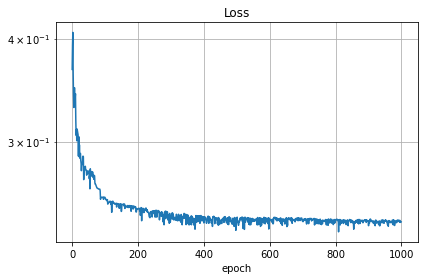

In [93]:
plt.semilogy(loss.values,
             #color=palette_hc[-2],
            )
plt.grid(which='both')
plt.title('Loss')
plt.xlabel('epoch')
plt.tight_layout()

# dirname = os.path.join("../images/maleckar/reports/", case,)
# os.makedirs(dirname, exist_ok=True)     

# plt.savefig(os.path.join(dirname, "loss.png"), dpi=600)

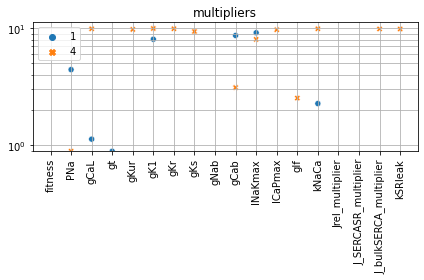

In [23]:
sns.scatterplot(data=df_sol.loc['common'])
plt.setp(plt.gca().get_xticklabels(), rotation=90)
plt.yscale('log')
plt.grid(which='both')
plt.title('multipliers')

plt.tight_layout()

#plt.savefig("./images/koivumaki/reports/Fri_Dec_4_mults.png", dpi=300)

KeyError: 'Na_i'

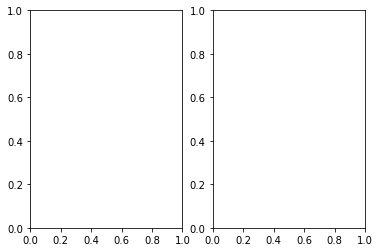

In [51]:
fig, axes = plt.subplots(ncols=2)

for i, item in enumerate(['Na_i', 'K_i']):
    plt.sca(axes[i])
    df = df_sol.loc[idx[:, item]].T.unstack().copy()
    df.index = df.index.astype('str')
    sns.scatterplot(data=df)
    plt.setp(plt.gca().get_xticklabels(), rotation=90)
    plt.grid()
    plt.title(item)
    plt.xlabel('CL')
    
plt.tight_layout()

#plt.savefig("./images/koivumaki/reports/Fri_Dec_4_params.png", dpi=300)

In [10]:
phenotype_model = {}
phenotype_model_last = {}
gc.collect()


for exp_cond_name in tqdm(config['experimental_conditions']):
    
    if exp_cond_name == 'common':
        continue
    
    if True:
        index_col = ['epoch', 'index']
        usecols = index_col + ['V',
                               #'Cai1', 'Cai2', 'Cai3', 'Cai4', 'Cass',
                               #'Nai', 'Ki',
                               'Na_i', 'K_i',
                               ] 

        filename = os.path.join(config_path, "phenotype", f"phenotype_{exp_cond_name}.csv")
        if os.path.isfile(filename):
            try:
                phenotype_model_last[exp_cond_name] = pd.read_csv(filename,
                                                                  #usecols=usecols
                                                                 )
                phen_len = len(phenotype_model_last[exp_cond_name])
            except pd.errors.EmptyDataError as e:
                print(f'{filename} is empty')
                continue

    
            if False:
                filename = os.path.join(config_path, "phenotype", f"phenotype_{exp_cond_name}.bin")    
                phenotype_model[exp_cond_name] = np.fromfile(filename, dtype=np.float32).reshape(-1, len(config['runtime']['states_initial']))

                n_epochs = len(phenotype_model[exp_cond_name]) // phen_len

                m_index_tuples = [(epoch, index) for epoch in range(n_epochs) for index in range(phen_len)]
                m_index = pd.MultiIndex.from_tuples(m_index_tuples)

                phenotype_model[exp_cond_name] = pd.DataFrame(phenotype_model[exp_cond_name],
                                                              index=m_index,
                                                              columns=phenotype_model_last[exp_cond_name].columns)

  0%|          | 0/5 [00:00<?, ?it/s]

In [24]:
#dump.columns.levels

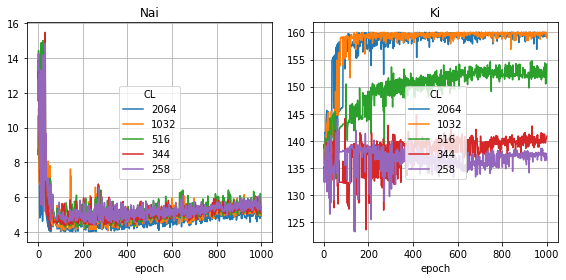

In [17]:
items = ['Nai', 'Ki']
#items = ['Na_i', 'K_i']


nrows = 1
ncols = len(items)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols,
                         figsize=plt.figaspect(nrows / ncols),
                         #sharex='col', sharey='row',
                        )

for i, item in enumerate(items):
    plt.sca(axes[i])
    for column in dump:
        if item not in column:
            continue
        #max_epoch = dump.index[-1][0]
        #x_space = np.linspace(0, max_epoch, len(dump))
        plt.plot(dump.loc[idx[:, 0], column].values, label=column[0])
    plt.legend(title='CL', loc='center')
    plt.xlabel('epoch')
    plt.grid()
    plt.title(item)

# dirname = os.path.join("../images/maleckar/reports/", case,)
# os.makedirs(dirname, exist_ok=True)                

plt.tight_layout()
#plt.savefig(os.path.join(dirname, "concentrations.png"), dpi=600)

In [15]:
[(i, output['trio']) for i, output in enumerate(output_list)]

[(0, (1, 2, '210201_225221')), (1, (4, 1, '210201_232420'))]

CL = 2064, rmse_V = 6.768e+00
CL = 1032, rmse_V = 7.589e+00
CL = 516, rmse_V = 1.303e+01
CL = 344, rmse_V = 1.562e+01
CL = 258, rmse_V = 1.770e+01


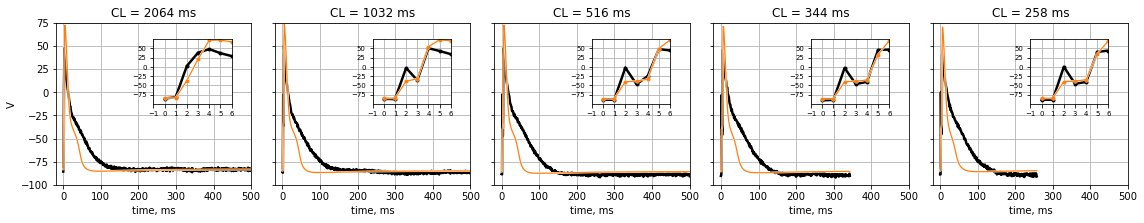

In [70]:
nrows = 1
ncols = 5 # len(exp_cond_dict)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols,
                         figsize=plt.figaspect(nrows / ncols),
                         sharex='col', sharey='row')

for i_output in 1,:

    config = output_list[i_output]['config']
    phenotype_model_last = output_list[i_output]['phenotype_model_last']

    exp_cond_dict = [item for item in config['experimental_conditions'].items() if item[0] != 'common']

    item = 'V'

    for i_cond, (exp_cond_name, exp_cond) in enumerate(exp_cond_dict):

        ax = axes[i_cond]
        ax_inset = ax.inset_axes([0.5, 0.5, 0.4, 0.4])

        exp = exp_cond['phenotype']['V']
        model = phenotype_model_last[exp_cond_name]['V'].values[:len(exp)]

        exp, model = map(lambda x: np.roll(x, 1), [exp, model])

        rmse = calculate_RMSE(exp, model)

        ax.set_yticks(np.arange(-100, 75 + 1, 25))
        ax.set_ylim(-100, 75)

        print(f"CL = {exp_cond_name}, rmse_{item} = {rmse:.3e}")

        if i_cond == 0:
            ax.set_ylabel(item)

        for ml, ax_ in zip(['-', '.-'], [ax, ax_inset]):

            ax_.plot(exp, ml, color='w', lw=3)
            ax_.plot(exp, ml,
                     color='k', #color=palette_hc[3],
                     lw=2.5, label='exp')

            ax_.plot(model, ml, color='w', lw=2)
            ax_.plot(model, ml,
                     color=f"C{i_output}", #palette_hc[2],
                     lw=1.25, label='model')

        ax.set_title(f'CL = {exp_cond_name} ms')
        ax.set_xlabel('time, ms')

        ax.set_xticks(np.arange(0, 750+1, 100))
        ax.set_xlim(-20, 500)


        ax_inset.set_xlim(-1, 6)
        ax_inset.set_ylim(ax.get_ylim())
        ax_inset.set_yticks(ax.get_yticks()[1:-1])
        ax_inset.set_xticks(np.arange(-1, 6+1, 1))
        ax_inset.tick_params(axis='both', labelsize='x-small')

        for ax_ in ax, ax_inset:
            ax_.grid(True)

fig.align_labels()
plt.tight_layout()

# dirname = os.path.join("../images/maleckar/reports/", case,)
# os.makedirs(dirname, exist_ok=True)               

# plt.savefig(os.path.join(dirname, "waveforms.png"), dpi=600, facecolor='white')

Text(0.5, 0.98, 'This is the figure title')

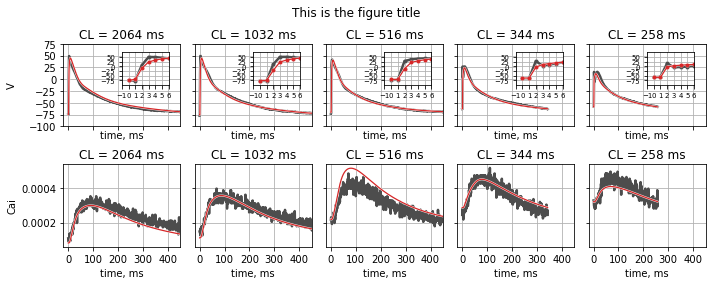

In [140]:
output = output_list[-1]

config = output['config']
exp_cond_dict = [item for item in config['experimental_conditions'].items() if item[0] != 'common']
phenotype_model_last = output['phenotype_model_last']

nrows = 2
ncols = len(phenotype_model_last)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols,
                         figsize=plt.figaspect(nrows / ncols),
                         sharex='col', sharey='row')


for i_item, item in enumerate(['V', 'Cai']):

    for i_cond, (exp_cond_name, exp_cond) in enumerate(exp_cond_dict):

        ax = axes[i_item, i_cond]
        
        ax.set_title(f'CL = {exp_cond_name} ms')
        ax.set_xlabel('time, ms')

        xlim_right = 450
        ax.set_xticks(np.arange(0, xlim_right+1, 100))
        ax.set_xlim(-20, xlim_right)
        
        ax.grid(True)

        exp = exp_cond['phenotype'][item]

        if item == 'Cai':
            
            ax_inset = None

            legend = config['runtime']['legend'] 
            volumes = legend['constants'][['Vss'] + [f'Vnonjunct{i}' for i in range(1, 4 + 1)]]
            concentrations = phenotype_model_last[exp_cond_name][['Cass'] + [f'Cai{i}' for i in range(1, 4 + 1)]]
            Cai_mean = (concentrations.values * volumes.values).sum(axis=1) / sum(volumes)
            Cai_mean = Cai_mean[:len(exp)]

            model = Cai_mean

#             ax.set_yticks(np.arange(0, 0.0011, 0.00025))
#             ax.set_ylim(0, 0.001)

        else:
        
            ax.set_yticks(np.arange(-100, 75 + 1, 25))
            ax.set_ylim(-100, 75)
            
            ax_inset = ax.inset_axes([0.5, 0.5, 0.4, 0.4])
            
            ax_inset.set_xlim(-1, 6)
            ax_inset.set_ylim(ax.get_ylim())
            ax_inset.set_yticks(ax.get_yticks()[1:-1])
            ax_inset.set_xticks(np.arange(-1, 6+1, 1))
            ax_inset.tick_params(axis='both', labelsize='x-small')
            
            ax_inset.grid(True)

            model = phenotype_model_last[exp_cond_name]['V'].values[:len(exp)]

        exp, model = map(lambda x: np.roll(x, 1), [exp, model])

#         rmse = calculate_RMSE(exp, model)
#         print(f"CL = {exp_cond_name}, rmse_{item} = {rmse:.3e}")

        if i_cond == 0:
            ax.set_ylabel(item)

        for ml, ax_ in zip(['-', '.-'], [ax, ax_inset]):
            
            if ax_ is None:
                continue

            ax_.plot(exp, ml, color='w', lw=3)
            ax_.plot(exp, ml, color='0.3', lw=2.5, label='exp')

            ax_.plot(model, ml, color='w', lw=2)
            ax_.plot(model, ml, color='C3', lw=1.25, label='model')

fig.align_labels()
plt.tight_layout()
plt.subplots_adjust(top=0.85)

fig.suptitle('This is the figure title')

# dirname = os.path.join("../images/maleckar/reports/", case,)
# os.makedirs(dirname, exist_ok=True)               

# plt.savefig(os.path.join(dirname, "waveforms.png"), dpi=600, facecolor='white')

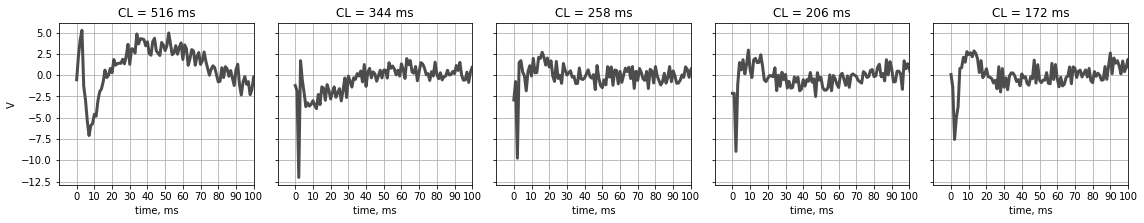

In [18]:
exp_cond_dict = [item for item in config['experimental_conditions'].items() if item[0] != 'common']


nrows = 1
ncols = len(exp_cond_dict)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols,
                         figsize=plt.figaspect(nrows / ncols),
                         sharex='col', sharey='row')

item = 'V'

for i_cond, (exp_cond_name, exp_cond) in enumerate(exp_cond_dict):

    ax = axes[i_cond]

    exp = exp_cond['phenotype']['V']
    model = phenotype_model_last[exp_cond_name]['V'].values[:len(exp)]
    
    exp, model = map(lambda x: np.roll(x, 1), [exp, model])

#     ax.set_yticks(np.arange(-100, 75 + 1, 25))
#     ax.set_ylim(-100, 75)

    if i_cond == 0:
        ax.set_ylabel(item)

    ax.plot(exp - model, '-', color='0.3', lw=3)

    ax.grid()

    ax.set_title(f'CL = {exp_cond_name} ms')
    ax.set_xlabel('time, ms')
    
    ax.set_xlim(-10, 100)
    ax.set_xticks(np.arange(0, 100+1, 10))


              
dirname = os.path.join("../images/maleckar/reports/", case,)
os.makedirs(dirname, exist_ok=True)                

fig.align_labels()
plt.tight_layout()
#plt.savefig(os.path.join(dirname, "waveforms_diff.png"), dpi=600, facecolor='white')

In [18]:
import pyCardiac as pc

In [19]:
exp_cond_dict = [item for item in config['experimental_conditions'].items() if item[0] != 'common']

m_index = pd.MultiIndex.from_product([[x[0] for x in exp_cond_dict],
                                      ['exp', 'model']], names=['CL', None])

df = pd.DataFrame(index=m_index, columns=['RP', 'APA', 'dVdt_max', 'APD80'])

for i_cond, (exp_cond_name, exp_cond) in enumerate(exp_cond_dict):

    exp = exp_cond['phenotype']['V'].values
    model = phenotype_model_last[exp_cond_name]['V'].values[:len(exp)]
    
    df.loc[idx[exp_cond_name, :], 'RP'] = exp[-1], model[-1]
    df.loc[idx[exp_cond_name, :], 'APA'] = np.ptp(exp), np.ptp(model)
    df.loc[idx[exp_cond_name, :], 'dVdt_max'] = np.max(np.diff(exp)), np.max(np.diff(model))
    
    t = np.arange(len(exp))
    df.loc[idx[exp_cond_name, :], 'APD80'] = [pc.signal.analysis.calculate_APD(t, exp),
                                              pc.signal.analysis.calculate_APD(t, model)]

NameError: name 'config' is not defined

In [21]:
df

RP         APA   dVdt_max APD80
CL                                               
516 exp   -83.007812  129.394531  70.190430    97
    model -82.470832  124.368473  68.238244   103
344 exp   -76.293945  117.492676  72.021484    94
    model -75.076019  114.110646  82.212481    89
258 exp   -77.819824  115.356445  72.021484    88
    model -74.913128  110.763646  81.028040    83
206 exp   -73.852539  107.421875  75.378418    83
    model -71.721185  103.326965  82.202803    78
172 exp   -69.885254   97.961426  74.157715    76
    model -69.967803   97.598365  80.274809    74

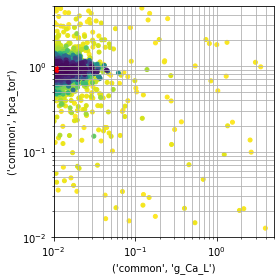

In [136]:
plt.figure(figsize=plt.figaspect(1))

name_x, name_y = ('common', 'g_Ca_L'), ('common', 'pca_tor')
#name_x, name_y = ('1032', 'K_i'), ('1032', 'Na_i')

epoch = 0

df = dump.loc[epoch][::-1]
#c = np.arange(len(df)) # np.log(-df['common', 'fitness'])

scat = plt.scatter(df[name_x], df[name_y], c=df.index, s=16)
line_best, = plt.plot(df[name_x].loc[0],
                      df[name_y].loc[0], 'Xr')

if genes[name_x[0]][name_x[1]].get('is_multiplier', False):
    plt.xscale('log')
if genes[name_y[0]][name_y[1]].get('is_multiplier', False):
    plt.yscale('log')

plt.xlabel(name_x)
plt.ylabel(name_y)

plt.xlim(genes[name_x[0]][name_x[1]]['bounds'])
plt.ylim(genes[name_y[0]][name_y[1]]['bounds'])

plt.grid(which='both')
plt.tight_layout()
#plt.gcf().align_labels()

dirname = os.path.join("../images/maleckar_tor/reports/", case, 'pairplots', "_".join(name_x + name_y))
os.makedirs(dirname, exist_ok=True)

for epoch in tqdm(range(0, dump.index[-1][0])):
    df = dump.loc[epoch][::-1]
    #c = np.arange(len(df)) # np.log(-df['common', 'fitness'])
    scat.set_offsets(df[[name_x, name_y]])
    scat.set_array(df.index)
    line_best.set_data(df[name_x].loc[0], df[name_y].loc[0])
    plt.savefig(os.path.join(os.path.join(dirname, f"pairplot_{epoch:04d}.png")), dpi=200)

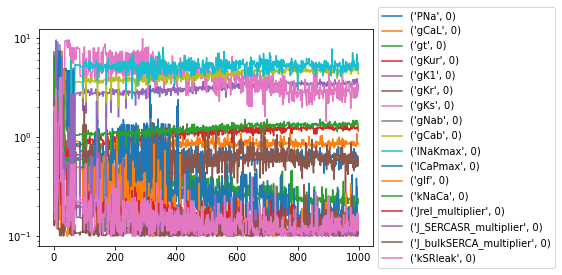

In [20]:
df = dump.loc[idx[:, 0], 'common'].unstack().iloc[:, 1:]

for key in df:
    plt.semilogy(df[key], label=key)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Prepare baselines

In [29]:
import numpy as np
import pandas as pd
import ctypes
import matplotlib.pyplot as plt

import time
import os

import sys
sys.path.append("../")

from src.helpers import update_array_from_kwargs, get_value_by_key

dirname = '../src/model_ctypes/_maleckar_ical_ghk_tor/'
filename_so = os.path.join(dirname, 'maleckar.so')

dirname = '../src/model_ctypes/_koivumaki/'
filename_so = os.path.join(dirname, 'koivumaki.so')

filename_so_abs = os.path.abspath(filename_so)

model = ctypes.CDLL(filename_so_abs)

# model.initialize_states_default.argtypes = [
#     np.ctypeslib.ndpointer(dtype=np.float64, ndim=1, flags='C_CONTIGUOUS')
# ]

# model.initialize_states_default.restype = ctypes.c_void_p


# model.initialize_constants_default.argtypes = [
#     np.ctypeslib.ndpointer(dtype=np.float64, ndim=1, flags='C_CONTIGUOUS')
# ]

# model.initialize_constants_default.restype = ctypes.c_void_p


# model.computeRates.argtypes = [
#     ctypes.c_double,
#     np.ctypeslib.ndpointer(dtype=np.float64, ndim=1, flags='C_CONTIGUOUS'),
#     np.ctypeslib.ndpointer(dtype=np.float64, ndim=1, flags='C_CONTIGUOUS'),
#     np.ctypeslib.ndpointer(dtype=np.float64, ndim=1, flags='C_CONTIGUOUS'),
#     np.ctypeslib.ndpointer(dtype=np.float64, ndim=1, flags='C_CONTIGUOUS')
# ]
# model.computeRates.restype = ctypes.c_void_p


# model.computeVariables.argtypes = [
#     ctypes.c_double,
#     np.ctypeslib.ndpointer(dtype=np.float64, ndim=1, flags='C_CONTIGUOUS'),
#     np.ctypeslib.ndpointer(dtype=np.float64, ndim=1, flags='C_CONTIGUOUS'),
#     np.ctypeslib.ndpointer(dtype=np.float64, ndim=1, flags='C_CONTIGUOUS'),
#     np.ctypeslib.ndpointer(dtype=np.float64, ndim=1, flags='C_CONTIGUOUS')
# ]
# model.computeVariables.restype = ctypes.c_void_p


model.run.argtypes = [
    np.ctypeslib.ndpointer(dtype=np.float64, ndim=1, flags='C_CONTIGUOUS'),
    np.ctypeslib.ndpointer(dtype=np.float64, ndim=1, flags='C_CONTIGUOUS'),
    ctypes.c_int,
    ctypes.c_double,
    ctypes.c_double,
    np.ctypeslib.ndpointer(dtype=np.float64, ndim=2, flags='C_CONTIGUOUS')#,
    #np.ctypeslib.ndpointer(dtype=np.float64, ndim=2, flags='C_CONTIGUOUS'),
    #np.ctypeslib.ndpointer(dtype=np.float64, ndim=1, flags='C_CONTIGUOUS')
]

model.run.restype = ctypes.c_int



# model.run_chain.argtypes = [
#     np.ctypeslib.ndpointer(dtype=np.float64, ndim=1, flags='C_CONTIGUOUS'),
#     np.ctypeslib.ndpointer(dtype=np.float64, ndim=1, flags='C_CONTIGUOUS'),
#     ctypes.c_int,
#     ctypes.c_double,
#     ctypes.c_double,
#     ctypes.c_int,
#     ctypes.c_double,
#     ctypes.c_double,
#     np.ctypeslib.ndpointer(dtype=np.float64, ndim=2, flags='C_CONTIGUOUS'),
# ]

# model.run_chain.restype = ctypes.c_int


# legend_algebraic = pd.read_csv(os.path.join(dirname, "legend_algebraic.csv"), index_col='name')
# legend_algebraic = legend_algebraic.iloc[:, :0]
# legend_algebraic['value'] = 0.0

legend_constants = pd.read_csv(os.path.join(dirname, "legend_constants.csv"), index_col='name')['value']
legend_states = pd.read_csv(os.path.join(dirname, "legend_states.csv"), index_col='name')['value']

In [30]:
# S = np.zeros(len(legend_states)) #  np.loadtxt("S.txt")
# C = np.zeros(len(legend_constants)) #  np.loadtxt("C.txt")

# model.initialize_states_default(S)
# model.initialize_constants_default(C)

In [31]:
# S = legend_states.copy()
# C = legend_constants.copy()

# A = legend_algebraic.copy()
# R = np.zeros(len(legend_states))

In [54]:
output = output_list[1]

genes = output['dump_last'].iloc[0, 1:]
phenotype_model_last = output['phenotype_model_last']
config = output['config']

state = pd.DataFrame({exp_cond_name: phenotype_model_last[exp_cond_name].iloc[-1]
                      for exp_cond_name in config['experimental_conditions'] if exp_cond_name != 'common'})

C, S = create_C_S(dict(genes=genes, state=state), config, '258')

STIM_LEVEL 1.5
Na_o 140
Ca_o 2.0
K_o 4
STIM_PERIOD 0.258


In [33]:
C['g_K1'] *= 100

KeyError: 'g_K1'

In [50]:
C['g_K1'] *= 0.5
C['P_Na'] *= 0.6
C['g_Ca_L'] *= 0.5
#P_Ca_L_ToR_ORd*0.5

In [197]:
# C['stim_amplitude'] *= 2
# C['stim_amplitude']

In [7]:
S = legend_states.copy()
C = legend_constants.copy()

In [53]:
C['stim_amplitude'] = -180

In [98]:
C['stim_period'] = 1
C['stim_duration'] = 0.001
C['stim_amplitude'] = -60
#C['pca_tor'] = 0 # 5e-5 * 4
#C['g_Ca_L'] = 3 * 6.75

In [143]:
C['pca_tor'] = 5e-5 * 4


In [198]:
C['stim_period'] = 1

In [184]:
#C.to_csv("../../../projects/Rheeda/G3C1/andrey_constants.csv")

In [64]:
t_sampling = 0.001 # 0.001

#stim_period = C['stim_period'] # C[config['stim_period_legend_name']]
stim_period = C[config['stim_period_legend_name']] # C[config['stim_period_legend_name']]
#stim_period = get_value_by_key(C, legend_constants, 'stim_period')
n_samples_per_stim = int(stim_period / t_sampling)

n_beats = 100
tol = 1e-6

chain_length = 200
v_threshold = 1e-1
t_safe = 5e-2

output = np.zeros((n_samples_per_stim * n_beats + 1, len(S)))
#output_A = np.zeros((n_samples_per_stim * n_beats + 1, 107))
#output_t = np.zeros((n_samples_per_stim * n_beats + 1))

In [55]:
status = model.run_chain(S.values.copy(), C.values.copy(),
                         chain_length, v_threshold, t_safe,
                         n_beats, t_sampling, tol, output)

print(status)

2


In [65]:
status = model.run(S.values.copy(), C.values.copy(),
                   n_beats, t_sampling, tol, output)

print(status)

2


In [66]:
#output = np.loadtxt(os.path.join(dirname, "output.txt"))

In [67]:
output = pd.DataFrame(output, columns=legend_states.index)

In [68]:
output.head()

name,CaSR1,CaSR2,CaSR3,CaSR4,Cai1,Cai2,Cai3,Cai4,Cass,d,...,o1,o2,o3,oss,serca_a1,serca_a2,serca_a3,serca_ass,Nai,Nass
0,0.787886,0.762781,0.706953,0.621874,0.000448,0.000449,0.000454,0.000470,0.000464,0.000013,...,0.000465,0.000454,0.000825,0.000297,0.006905,0.006587,0.005876,0.004804,15.708736,15.947830
1,0.787790,0.762664,0.706904,0.622210,0.000448,0.000449,0.000453,0.000469,0.000466,0.003823,...,0.000458,0.000444,0.000794,0.000286,0.006903,0.006585,0.005873,0.004804,15.708738,16.043006
2,0.787693,0.762548,0.706854,0.622544,0.000448,0.000448,0.000452,0.000469,0.000484,0.368822,...,0.000451,0.000435,0.000764,0.000294,0.006902,0.006582,0.005871,0.004806,15.708747,16.555046
3,0.787595,0.762430,0.706804,0.622877,0.000447,0.000448,0.000452,0.000471,0.000513,0.616489,...,0.000444,0.000426,0.000736,0.000380,0.006900,0.006580,0.005869,0.004811,15.708756,16.542421
4,0.787496,0.762312,0.706754,0.623204,0.000447,0.000447,0.000451,0.000474,0.000544,0.766775,...,0.000438,0.000417,0.000709,0.000697,0.006898,0.006577,0.005866,0.004820,15.708766,16.517090


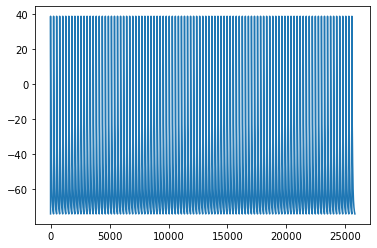

In [69]:
plt.plot(output.V)

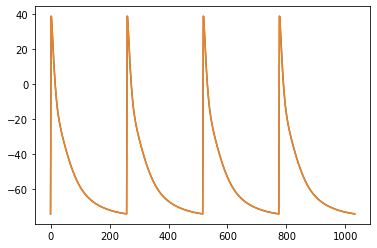

In [70]:
plt.plot(output.V[:1032].values)
plt.plot(output.V[-1033:].values)

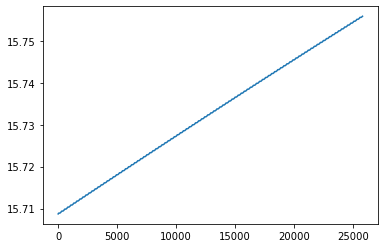

In [71]:
# plt.plot(output.Na_i)
plt.plot(output.Nai)

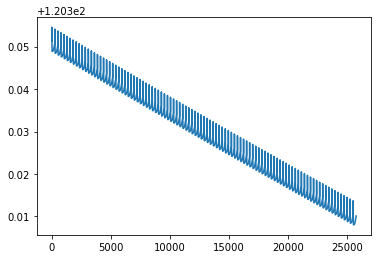

In [72]:
plt.plot(output.Ki)

In [46]:
# plt.plot(output.Ca_up)
# plt.plot(output.Ca_rel)

In [149]:
A = legend_algebraic.values.flatten()
R = np.zeros(len(legend_states))

#output = df.copy()
A_list = np.zeros((len(output), len(A)))

for i in range(len(output)):
    model.computeVariables(0, C.values, R, output.iloc[i].values, A)
    A_list[i] = A.copy()

In [153]:
A = pd.DataFrame(A_list, columns=legend_algebraic.index)

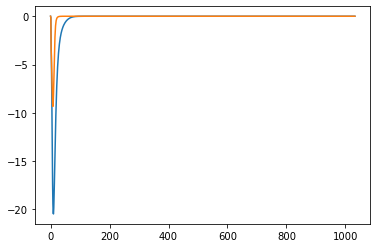

In [154]:
plt.plot(A.i_Ca_L)
plt.plot(A.ical_tor)

#plt.xlim(990, 1200)

In [207]:
#output.to_csv("../../../projects/Rheeda/G3C1/andrey_normal.csv", index=False)

In [208]:
tail = output[-1000 * 10 - 1:].reset_index()

In [209]:
tail

name,index,V,Na_c,Na_i,m,h1,h2,Ca_d,d_L,f_L1,...,O_C,O_TC,O_TMgC,O_TMgMg,O,Ca_rel,Ca_up,O_Calse,F1,F2
0,990000,-55.024745,140.021349,5.633908,0.032331,0.164876,0.158473,0.000055,0.000358,0.979689,...,0.009905,0.004740,0.154520,0.634265,1.375071,0.246570,0.247918,0.228319,0.522022,0.000090
1,990001,11.169576,140.017669,5.634408,0.986784,0.037737,0.134569,0.000143,0.097267,0.944823,...,0.009963,0.004763,0.154520,0.634270,1.375075,0.246578,0.248145,0.228323,0.522408,0.000091
2,990002,13.269086,140.016601,5.634553,0.992760,0.001347,0.096423,0.001218,0.417354,0.855242,...,0.010079,0.004812,0.154543,0.634258,1.375088,0.246587,0.248714,0.228328,0.522627,0.000256
3,990003,11.979645,140.016928,5.634508,0.991589,0.000049,0.069091,0.002852,0.620633,0.774190,...,0.010205,0.004867,0.154579,0.634236,1.375104,0.246059,0.249458,0.228294,0.520073,0.003156
4,990004,9.642786,140.017446,5.634438,0.988886,0.000003,0.049506,0.004627,0.744745,0.700956,...,0.011123,0.005244,0.154821,0.634135,1.375214,0.236759,0.253438,0.227148,0.510471,0.012895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,999996,-55.017970,140.020334,5.631853,0.032357,0.164676,0.158123,0.000055,0.000358,0.979657,...,0.009901,0.004738,0.154499,0.634280,1.375067,0.246396,0.247804,0.228193,0.520465,0.000090
9997,999997,-55.018539,140.020317,5.631856,0.032354,0.164697,0.158181,0.000055,0.000358,0.979662,...,0.009901,0.004737,0.154484,0.634291,1.375065,0.246401,0.247795,0.228197,0.520852,0.000090
9998,999998,-55.019102,140.020300,5.631858,0.032352,0.164717,0.158239,0.000055,0.000358,0.979666,...,0.009900,0.004737,0.154470,0.634302,1.375062,0.246407,0.247785,0.228202,0.521240,0.000090
9999,999999,-55.019658,140.020283,5.631860,0.032350,0.164738,0.158297,0.000055,0.000358,0.979671,...,0.009900,0.004737,0.154456,0.634313,1.375060,0.246412,0.247776,0.228206,0.521627,0.000090


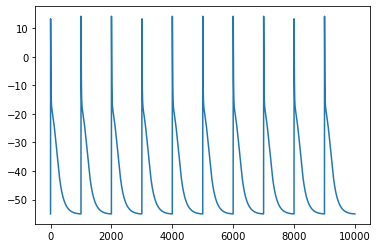

In [210]:
plt.plot(tail.V)

In [211]:
# tail.to_csv("../../../projects/Rheeda/G3C1/andrey_fibrosis.csv", index=False)

In [212]:
tail

name,index,V,Na_c,Na_i,m,h1,h2,Ca_d,d_L,f_L1,...,O_C,O_TC,O_TMgC,O_TMgMg,O,Ca_rel,Ca_up,O_Calse,F1,F2
0,990000,-55.024745,140.021349,5.633908,0.032331,0.164876,0.158473,0.000055,0.000358,0.979689,...,0.009905,0.004740,0.154520,0.634265,1.375071,0.246570,0.247918,0.228319,0.522022,0.000090
1,990001,11.169576,140.017669,5.634408,0.986784,0.037737,0.134569,0.000143,0.097267,0.944823,...,0.009963,0.004763,0.154520,0.634270,1.375075,0.246578,0.248145,0.228323,0.522408,0.000091
2,990002,13.269086,140.016601,5.634553,0.992760,0.001347,0.096423,0.001218,0.417354,0.855242,...,0.010079,0.004812,0.154543,0.634258,1.375088,0.246587,0.248714,0.228328,0.522627,0.000256
3,990003,11.979645,140.016928,5.634508,0.991589,0.000049,0.069091,0.002852,0.620633,0.774190,...,0.010205,0.004867,0.154579,0.634236,1.375104,0.246059,0.249458,0.228294,0.520073,0.003156
4,990004,9.642786,140.017446,5.634438,0.988886,0.000003,0.049506,0.004627,0.744745,0.700956,...,0.011123,0.005244,0.154821,0.634135,1.375214,0.236759,0.253438,0.227148,0.510471,0.012895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,999996,-55.017970,140.020334,5.631853,0.032357,0.164676,0.158123,0.000055,0.000358,0.979657,...,0.009901,0.004738,0.154499,0.634280,1.375067,0.246396,0.247804,0.228193,0.520465,0.000090
9997,999997,-55.018539,140.020317,5.631856,0.032354,0.164697,0.158181,0.000055,0.000358,0.979662,...,0.009901,0.004737,0.154484,0.634291,1.375065,0.246401,0.247795,0.228197,0.520852,0.000090
9998,999998,-55.019102,140.020300,5.631858,0.032352,0.164717,0.158239,0.000055,0.000358,0.979666,...,0.009900,0.004737,0.154470,0.634302,1.375062,0.246407,0.247785,0.228202,0.521240,0.000090
9999,999999,-55.019658,140.020283,5.631860,0.032350,0.164738,0.158297,0.000055,0.000358,0.979671,...,0.009900,0.004737,0.154456,0.634313,1.375060,0.246412,0.247776,0.228206,0.521627,0.000090


In [74]:
err_abs = output.iloc[-1] - output.iloc[0]
err_rel = err_abs / output.iloc[0] * 100

In [76]:
items = ['Na_i', 'K_i', 'V', 'Ca_i']
items = ['Nai', 'Ki']

df_err= pd.DataFrame([err_rel[items], err_abs[items]],
                     index=['err_rel', 'err_abs'])
df_err

name,Nai,Ki
err_rel,0.299852,-0.034276
err_abs,0.047103,-0.041251


# 3D

spherical stimulus of radius 0.75mm

stimulus[0].strength     = 3e2 units: uA/cm^3(3D current)

stimulus[0].duration     = 5 [ms]

$(100 um)^3 \cdot 300 uA / cm^3 = (10^2 \cdot 10^{-6} m)^3 \cdot 3 \cdot 10^{-4} \cdot 10^6 A/m^{-3} = 10^{-12} m^3 \cdot 3 \cdot 10^2 A / m^3 = 3 \cdot 10^{-10} A = 10 nA$

Cm = 0.05 nF

In [104]:
def calculate_diffusion(V, g_gap_junc_tensor):
        
    I = np.zeros_like(V)
        
    for axis in range(V.ndim):

        indices_next, indices_prev = [slice(None)] * 3, [slice(None)] * 3
        indices_next[axis] = slice(1, None)        
        indices_prev[axis] = slice(0, -1)
        indices_next = tuple(indices_next)
        indices_prev = tuple(indices_prev)

        I[indices_next] = I[indices_next] - g_gap_junc_tensor[axis] * (V[indices_prev] - V[indices_next])
        I[indices_prev] = I[indices_prev] - g_gap_junc_tensor[axis] * (V[indices_next] - V[indices_prev])
            
    return I


def is_pacing_condition(t, ix, iy, iz, SIZE, stim_size):
    
    X_SIZE, Y_SIZE, Z_SIZE = SIZE

    pacing_condition =  (X_SIZE / 2 - stim_size / 2 <= ix <= X_SIZE / 2 + stim_size / 2)
    pacing_condition &= (Y_SIZE / 2 - stim_size / 2 <= iy <= Y_SIZE / 2 + stim_size / 2)
    pacing_condition &= (iz == 0)

    pacing_condition &= t < 5e-3
    
    return pacing_condition


def is_pacing_condition_sphere(t, ix, iy, iz, SIZE, R):
    
    X_SIZE, Y_SIZE, Z_SIZE = SIZE
    
    x_center, y_center, z_center = X_SIZE / 2, Y_SIZE / 2, 0

    pacing_condition =  (ix - x_center)**2 + (iy - y_center)**2 + (iz - z_center)**2 < R**2
    pacing_condition &= t < 5e-3
    
    return pacing_condition

In [105]:
dt = 2e-5

t_end = 2e-2
t_sampling = 1e-4

sigma_l = 0.126  # S/m
h = 100  # um

g_gap_junc = sigma_l * h # 5.0
g_gap_junc_tensor = [g_gap_junc,
                     g_gap_junc / 5,
                     g_gap_junc / 5]

N = int(t_end / dt)
step_print = int(t_sampling / dt)


X_SIZE, Y_SIZE, Z_SIZE = 61, 41, 21
SIZE = X_SIZE, Y_SIZE, Z_SIZE

A = np.zeros(70)
R = np.zeros_like(S)

S_tissue = np.tile(S.values, (*SIZE, 1))
C_tissue = np.tile(C.values, (*SIZE, 1))
C_tissue[:, :, :, 7] = 0
R_tissue = np.zeros_like(S_tissue)
A_tissue = np.tile(A, (*SIZE, 1))

result = np.zeros((*SIZE, int(t_end / t_sampling)))
i_print = 0
t = 0

stim_size = 10

In [106]:
IS_PARALLEL = False

for it in tqdm(range(N)):
    
    if it % step_print == 0:
        result[:, :, :, i_print] = S_tissue[:, :, :, 0]
        i_print += 1
        
    if IS_PARALLEL:

        C_tissue[X_SIZE / 2 - stim_size / 2: X_SIZE / 2 + stim_size / 2,
                 Y_SIZE / 2 - stim_size / 2: Y_SIZE / 2 + stim_size / 2,
                 0, 7] = -300 if t < 5e-3 else 0 

        args = zip([t] * (X_SIZE * Y_SIZE * Z_SIZE),
                   C_tissue.reshape(-1, C_tissue.shape[-1]),
                   R_tissue.reshape(-1, R_tissue.shape[-1]),
                   S_tissue.reshape(-1, S_tissue.shape[-1]),
                   A_tissue.reshape(-1, A_tissue.shape[-1]))

        with Pool(2) as p:
            R_list = p.map(f, args)

        R_tissue = np.array(R_list).reshape(R_tissue.shape)
        
    else:

        for ix in range(X_SIZE):
            for iy in range(Y_SIZE):
                for iz in range(Z_SIZE):

                    stim_amplitude = -200
                    #C['stim_amplitude'] = stim_amplitude if is_pacing_condition(t, ix, iy, iz, SIZE, stim_size) else 0
                    C['stim_amplitude'] = stim_amplitude if is_pacing_condition_sphere(t, ix, iy, iz, SIZE, R=7.5) else 0


                    model.computeRates(t,
                                       C.values,
                                       R_tissue[ix, iy, iz],
                                       S_tissue[ix, iy, iz],
                                       A.copy())

    V = S_tissue[:, :, :, 0]
    assert not np.any(np.isnan(V))
    I_gap_junc = calculate_diffusion(V, g_gap_junc_tensor)
    
    R_tissue[:, :, :, 0] = R_tissue[:, :, :, 0] - I_gap_junc * 1000
    
    S_tissue = S_tissue + dt * R_tissue            
    t += dt

  0%|          | 0/999 [00:00<?, ?it/s]

ArgumentError: argument 4: <class 'KeyboardInterrupt'>: 

In [107]:
ixc, iyc, izc = map(lambda x: int(x // 2), SIZE)
ic = ixc, iyc, izc

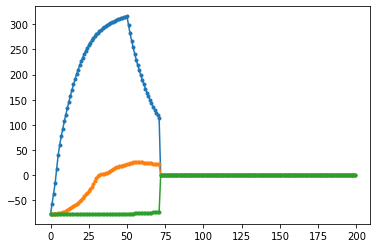

In [108]:
plt.plot(result[ixc, iyc, 0], '.-')
plt.plot(result[ic], '.-')
plt.plot(result[ixc, iyc, -1], '.-')

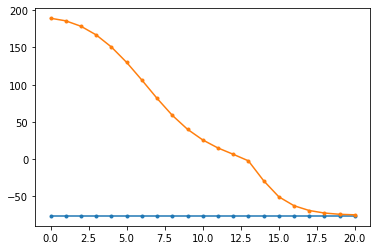

In [112]:
plt.plot(result[ixc, iyc, :, 0], '.-')
plt.plot(result[ixc, iyc, :, 60], '.-')

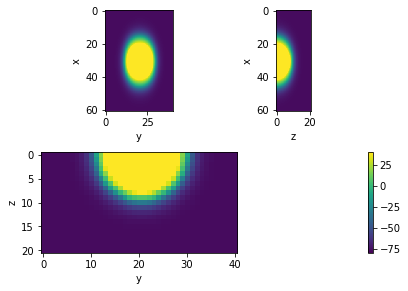

In [116]:
fig, axes = plt.subplots(2, 2,
                        #sharex='col', sharey='row',
                        )

t = 25

axes[0, 0].imshow(result[:, :, 0, t],
           vmin=-80, vmax=40,
           #aspect=10,
          )
axes[0, 0].set_xlabel('y')
axes[0, 0].set_ylabel('x')

axes[0, 1].imshow(result[:, iyc, :, t],
           vmin=-80, vmax=40,
           #aspect=10,
          )

axes[0, 1].set_xlabel('z')
axes[0, 1].set_ylabel('x')

im = axes[1, 0].imshow(result[ixc, :, :, t].T,
           vmin=-80, vmax=40,
           #aspect=10,
          )

axes[1, 0].set_xlabel('y')
axes[1, 0].set_ylabel('z')

axes[1, 1].set_visible(False)

plt.colorbar(im)

plt.tight_layout()

# Profiling

In [23]:
# l = []
# for i in range(128):
#     df = pd.read_csv(os.path.join(config_path, f"mpi/report_{i:04d}.csv")).iloc[1:]
#     df['rank'] = i
#     l.append(df)
    
# df = pd.concat(l)
# #df.set_index('rank', append=True, inplace=True)

In [24]:
# sns.barplot(y='gather_allgather', data=df, x='rank', palette="Blues")
# #sns.barplot(y='calc', data=df, x='rank', palette="Reds")